<a href="https://colab.research.google.com/github/Anjalichimnani/EVA4/blob/master/Assignment_8/EVA_S7_CIFAR10_RESNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
#https://modelzoo.co/model/data-augmentation-and-sampling-for-pytorch

In [2]:
# Mouting Drive location where all the modularized code is present
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Mapping the Drive location so that the files are loaded
import sys
sys.path.append('/content/drive/My Drive/EVA4/Assignment_8/python_files/')
from all_imports import *
import get_train_test as tt
import train_test_loader as ttl
import get_model as gm
import train_test_def as ttd


CUDA Available? True


In [4]:
# Test whether CUDA is available or not and the Device being used
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla P4


In [5]:
# Define the data sets 
#    - Both Train and Test data set
#    - Along with Transforms defined on it that are different for train and Test

train = tt.get_train('CIFAR10')
test = tt.get_test('CIFAR10')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
# Load the respective data
train_loader, test_loader = ttl.get_train_test_loader(train,test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
# Check the Model Summary - Parameters used and memory consumed. 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = gm.get_model_instance().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [8]:
# Run the Model and obtain the Train/Test Accuracy and Loss
#   Dropout Rate used is 0.1 which is passed as parameter to the model
#   Regulariation can be added to the code
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = gm.get_model_instance().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    a,b = ttd.train(model, device, train_loader, optimizer, epoch)
    train_losses.extend(a)
    train_acc.extend(b)
    c,d = ttd.test(model, device, test_loader)
    test_losses.extend(c)
    test_acc.extend(d)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.616754174232483 Batch_id=390 Accuracy=29.45: 100%|██████████| 391/391 [00:52<00:00,  7.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 3796/10000 (37.96%)


EPOCH: 2


Loss=1.4503271579742432 Batch_id=390 Accuracy=44.82: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0135, Accuracy: 4357/10000 (43.57%)


EPOCH: 3


Loss=1.1388537883758545 Batch_id=390 Accuracy=55.58: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 5851/10000 (58.51%)


EPOCH: 4


Loss=0.9356565475463867 Batch_id=390 Accuracy=63.49: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6334/10000 (63.34%)


EPOCH: 5


Loss=0.8551824688911438 Batch_id=390 Accuracy=68.60: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6431/10000 (64.31%)


EPOCH: 6


Loss=0.651341438293457 Batch_id=390 Accuracy=72.85: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6782/10000 (67.82%)


EPOCH: 7


Loss=0.5771520733833313 Batch_id=390 Accuracy=75.92: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6957/10000 (69.57%)


EPOCH: 8


Loss=0.7154237031936646 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7347/10000 (73.47%)


EPOCH: 9


Loss=0.5341737866401672 Batch_id=390 Accuracy=79.53: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7805/10000 (78.05%)


EPOCH: 10


Loss=0.39375728368759155 Batch_id=390 Accuracy=80.48: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7568/10000 (75.68%)


EPOCH: 11


Loss=0.6012153625488281 Batch_id=390 Accuracy=81.48: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7304/10000 (73.04%)


EPOCH: 12


Loss=0.363595187664032 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7595/10000 (75.95%)


EPOCH: 13


Loss=0.6520394086837769 Batch_id=390 Accuracy=83.08: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7458/10000 (74.58%)


EPOCH: 14


Loss=0.6171455979347229 Batch_id=390 Accuracy=83.07: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7886/10000 (78.86%)


EPOCH: 15


Loss=0.44349947571754456 Batch_id=390 Accuracy=83.75: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7897/10000 (78.97%)


EPOCH: 16


Loss=0.2586764097213745 Batch_id=390 Accuracy=92.24: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8743/10000 (87.43%)


EPOCH: 17


Loss=0.1349487602710724 Batch_id=390 Accuracy=95.66: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8751/10000 (87.51%)


EPOCH: 18


Loss=0.12370820343494415 Batch_id=390 Accuracy=97.34: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8773/10000 (87.73%)


EPOCH: 19


Loss=0.03375040739774704 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8748/10000 (87.48%)


EPOCH: 20


Loss=0.03161758556962013 Batch_id=390 Accuracy=99.00: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8734/10000 (87.34%)


EPOCH: 21


Loss=0.07276125252246857 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8757/10000 (87.57%)


EPOCH: 22


Loss=0.021988671272993088 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8773/10000 (87.73%)


EPOCH: 23


Loss=0.02180636301636696 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8770/10000 (87.70%)


EPOCH: 24


Loss=0.08754107356071472 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8720/10000 (87.20%)


EPOCH: 25


Loss=0.014036399312317371 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]



Test set: Average loss: 0.0036, Accuracy: 8732/10000 (87.32%)




Text(0.5, 1.0, 'Test Accuracy')

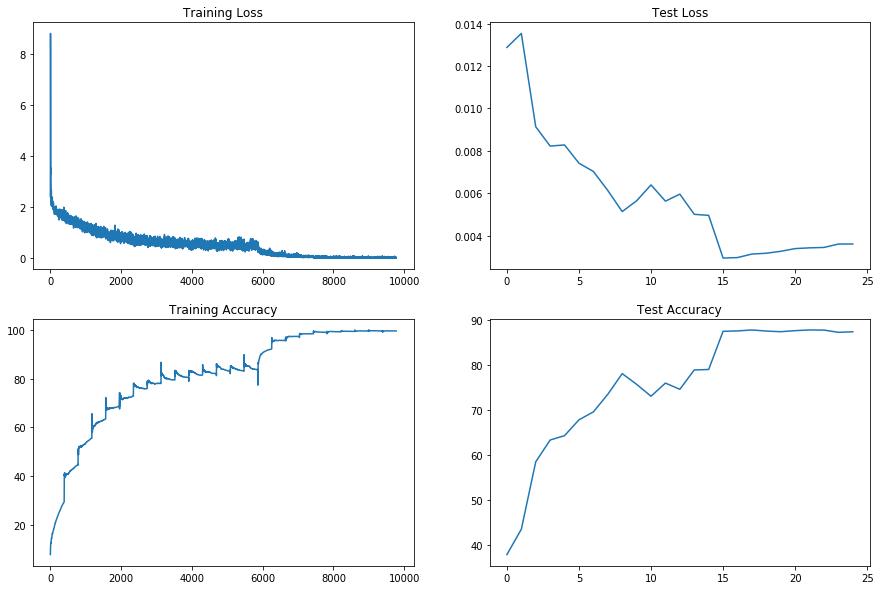

In [9]:
# Visualize the Training/Test Accuracy/Loss using Matplotlib

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")